In [168]:
# importing the programs I'll need, and showing the last five rows in the database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

batting = pd.read_csv('Batting.csv')
batting.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,0,4,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [156]:
# deleting everything from the Dead Ball Era and before
print(batting[['playerID', 'yearID', 'stint', 'teamID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']])

batting_past_1919 = batting['yearID'] > 1919
print(batting[batting_past_1919])



         playerID  yearID  stint teamID   G  ...  IBB  HBP   SH   SF  GIDP
0       abercda01    1871      1    TRO   1  ...  NaN  NaN  NaN  NaN   0.0
1        addybo01    1871      1    RC1  25  ...  NaN  NaN  NaN  NaN   0.0
2       allisar01    1871      1    CL1  29  ...  NaN  NaN  NaN  NaN   1.0
3       allisdo01    1871      1    WS3  27  ...  NaN  NaN  NaN  NaN   0.0
4       ansonca01    1871      1    RC1  25  ...  NaN  NaN  NaN  NaN   0.0
...           ...     ...    ...    ...  ..  ...  ...  ...  ...  ...   ...
108784  zimmebr02    2020      1    BAL   2  ...  0.0  0.0  0.0  0.0   0.0
108785  zimmejo02    2020      1    DET   3  ...  0.0  0.0  0.0  0.0   0.0
108786  zimmeky01    2020      1    KCA  16  ...  0.0  0.0  0.0  0.0   0.0
108787  zuberty01    2020      1    KCA  23  ...  0.0  0.0  0.0  0.0   0.0
108788  zuninmi01    2020      1    TBA  28  ...  0.0  3.0  0.0  0.0   0.0

[108789 rows x 21 columns]
         playerID  yearID  stint teamID lgID  ...  IBB  HBP   SH   SF  G

In [157]:
# deleting players with not enough (fewer than 200 in a season) at bats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

batting = pd.read_csv('Batting.csv')



batting_past_1919 = batting['yearID'] > 1919
enough_AB = batting['AB'] >= 200
batting.where(batting_past_1919 & enough_AB, inplace = True)
print(batting[batting_past_1919 & enough_AB])



         playerID  yearID  stint teamID lgID  ...  IBB  HBP    SH   SF  GIDP
18158   austiji01  1920.0    1.0    SLA   AL  ...  NaN  4.0  15.0  NaN   NaN
18167   bancrda01  1920.0    2.0    NY1   NL  ...  NaN  1.0  12.0  NaN   NaN
18169   barbetu01  1920.0    1.0    CHN   NL  ...  NaN  3.0  17.0  NaN   NaN
18178   bigbeca01  1920.0    1.0    PIT   NL  ...  NaN  6.0   6.0  NaN   NaN
18182   bodiepi01  1920.0    1.0    NYA   AL  ...  NaN  0.0  12.0  NaN   NaN
...           ...     ...    ...    ...  ...  ...  ...  ...   ...  ...   ...
108674  turnetr01  2020.0    1.0    WAS   NL  ...  0.0  2.0   0.0  2.0   5.0
108697  verdual01  2020.0    1.0    BOS   AL  ...  1.0  2.0   0.0  1.0   4.0
108708   voitlu01  2020.0    1.0    NYA   AL  ...  0.0  3.0   0.0  1.0   4.0
108720  walkech02  2020.0    1.0    ARI   NL  ...  0.0  3.0   0.0  3.0   6.0
108778  yelicch01  2020.0    1.0    MIL   NL  ...  2.0  1.0   0.0  0.0   4.0

[23135 rows x 22 columns]


In [158]:
# creating a column called "BA" for batting averave (H / AB)
batting["BA"]=(batting["H"]/batting.AB)
print(batting[batting_past_1919 & enough_AB])

# creating a column called "TB" for total bases — 2 for a double, 3 for a triple, 4 for a homer, 1 for a single (which isn't listed, but is just hits - doubles - triples - homers)
batting["TB"]=(batting["2B"]*2) + (batting["3B"]*3) + (batting["HR"]*4) + (batting["H"] - batting["2B"] - batting["3B"] - batting["HR"])
print(batting[batting_past_1919 & enough_AB])

# creating a column called "SLG" for slugging percentage — total bases / at bats 
batting["SLG"]=(batting["TB"]/batting.AB)
print(batting[batting_past_1919 & enough_AB])

# creating a column for ISO slugging (SLG minus BA)
batting["ISO"]=(batting["SLG"] - batting["BA"])
print(batting[batting_past_1919 & enough_AB])



         playerID  yearID  stint teamID lgID  ...  HBP    SH   SF  GIDP        BA
18158   austiji01  1920.0    1.0    SLA   AL  ...  4.0  15.0  NaN   NaN  0.271429
18167   bancrda01  1920.0    2.0    NY1   NL  ...  1.0  12.0  NaN   NaN  0.298643
18169   barbetu01  1920.0    1.0    CHN   NL  ...  3.0  17.0  NaN   NaN  0.264706
18178   bigbeca01  1920.0    1.0    PIT   NL  ...  6.0   6.0  NaN   NaN  0.280000
18182   bodiepi01  1920.0    1.0    NYA   AL  ...  0.0  12.0  NaN   NaN  0.295117
...           ...     ...    ...    ...  ...  ...  ...   ...  ...   ...       ...
108674  turnetr01  2020.0    1.0    WAS   NL  ...  2.0   0.0  2.0   5.0  0.334764
108697  verdual01  2020.0    1.0    BOS   AL  ...  2.0   0.0  1.0   4.0  0.308458
108708   voitlu01  2020.0    1.0    NYA   AL  ...  3.0   0.0  1.0   4.0  0.276995
108720  walkech02  2020.0    1.0    ARI   NL  ...  3.0   0.0  3.0   6.0  0.270642
108778  yelicch01  2020.0    1.0    MIL   NL  ...  1.0   0.0  0.0   4.0  0.205000

[23135 rows x 2

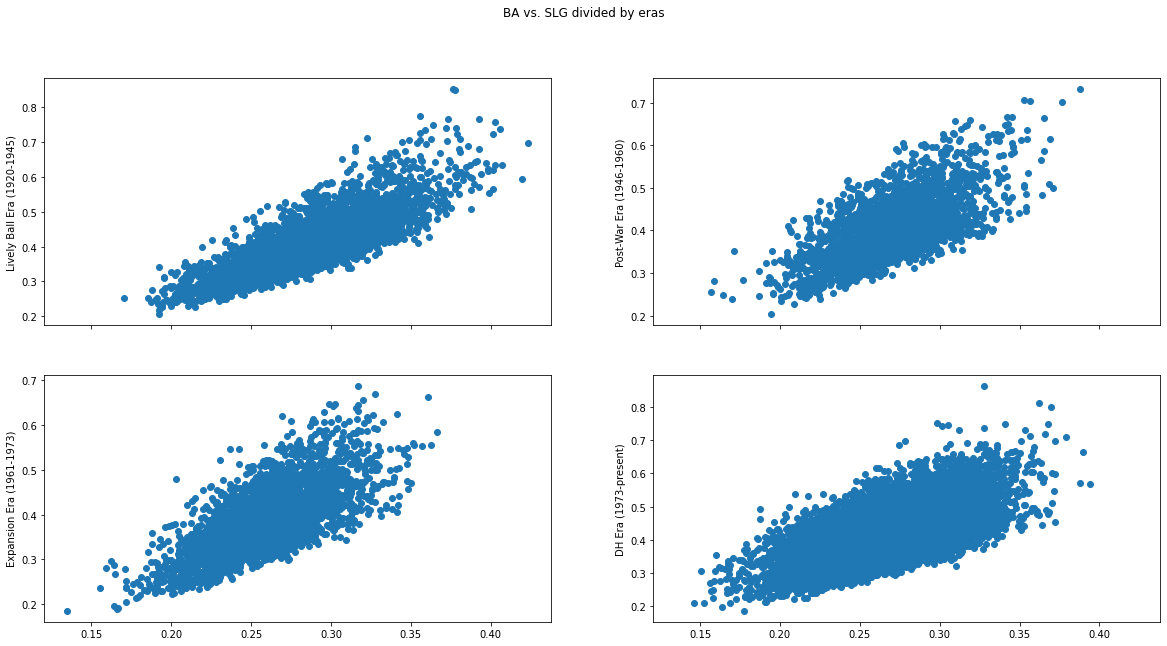

Live Ball: 1.8475832084384591
Post-War: 1.6484068630669038
Expansion Era: 1.752474919854872
DH: 1.5226693183691828


In [159]:
# plotting batting average vs. slugging percentage after the Dead Ball Era

fig, axarr = plt.subplots(2, 2, figsize=(20,10), sharex = True)


# Lively Ball Era (1920-1945)

b1920_1945 = (batting.yearID>1919)&(batting.yearID<1946)

x = batting[b1920_1945]["BA"]
y = batting[b1920_1945]["SLG"]
axarr[0, 0].scatter(x, y)
axarr[0, 0].set_ylabel("Lively Ball Era (1920-1945)")

a, b = np.polyfit(x, y, 1)


# Post-War Era (1946-1960)

b1946_1960 = (batting.yearID>1945)&(batting.yearID<1961)

x = batting[b1946_1960]["BA"]
y = batting[b1946_1960]["SLG"]
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_ylabel("Post-War Era (1946-1960)")

c, b = np.polyfit(x, y, 1)


# Expansion Era (1961-1973)

b1961_1973 = (batting.yearID>1960)&(batting.yearID<1974)

x = batting[b1961_1973]["BA"]
y = batting[b1961_1973]["SLG"]
axarr[1, 0].scatter(x, y)
axarr[1, 0].set_ylabel("Expansion Era (1961-1973)")

d, b = np.polyfit(x, y, 1)


# DH Era (1973-present)

b1961_1973 = (batting.yearID>1972)

x = batting[b1961_1973]["BA"]
y = batting[b1961_1973]["SLG"]
axarr[1, 1].scatter(x, y)
axarr[1, 1].set_ylabel("DH Era (1973-present)")

e, b = np.polyfit(x, y, 1)

fig.suptitle('BA vs. SLG divided by eras')


plt.show()
print("Live Ball: " + str(a))
print("Post-War: " + str(c))
print("Expansion Era: " + str(d))
print("DH: " + str(e))


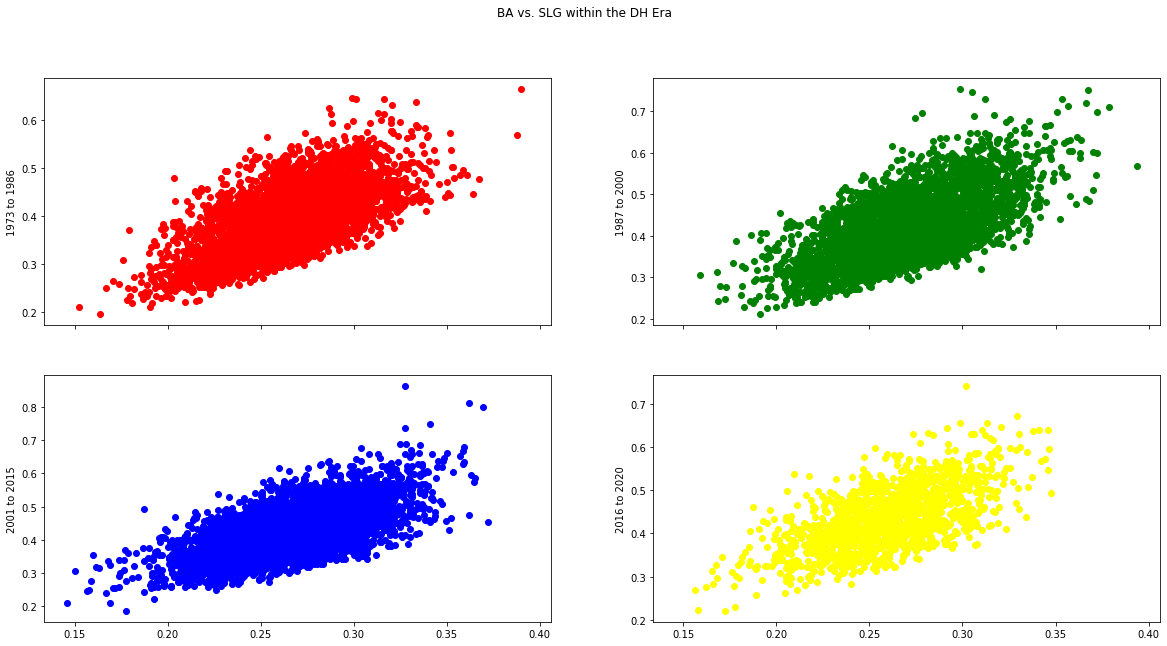

1973-1986: 1.4988574097990153
1987-2000: 1.6535090587567947
2001-2015: 1.5091451217708929
2016-2020 1.41264449367589


In [160]:
# plotting batting average vs. slugging percentage in the DH era



fig, axarr = plt.subplots(2, 2, figsize=(20,10), sharex = True)


# 1973-1986

b1973_1986 = (batting.yearID>=1973)&(batting.yearID<=1986)

x = batting[b1973_1986]["BA"]
y = batting[b1973_1986]["SLG"]
axarr[0, 0].scatter(x, y, color="red")
axarr[0, 0].set_ylabel("1973 to 1986")

a, b = np.polyfit(x, y, 1)


# 1987-2000

b1987_2000 = (batting.yearID>=1987)&(batting.yearID<=2000)

x = batting[b1987_2000]["BA"]
y = batting[b1987_2000]["SLG"]
axarr[0, 1].scatter(x, y, color="green")
axarr[0, 1].set_ylabel("1987 to 2000")

c, b = np.polyfit(x, y, 1)



# 2001-2015

b2001_2015 = (batting.yearID>=2001)&(batting.yearID<=2015)

x = batting[b2001_2015]["BA"]
y = batting[b2001_2015]["SLG"]
axarr[1, 0].scatter(x, y, color="blue")
axarr[1, 0].set_ylabel("2001 to 2015")

d, b = np.polyfit(x, y, 1)


# 2016-2020

b2016_2020 = (batting.yearID>=2016)&(batting.yearID<=2020)

x = batting[b2016_2020]["BA"]
y = batting[b2016_2020]["SLG"]
axarr[1, 1].scatter(x, y, color="yellow")
axarr[1, 1].set_ylabel("2016 to 2020")

e, b = np.polyfit(x, y, 1)

fig.suptitle('BA vs. SLG within the DH Era')



plt.show()

print("1973-1986: " + str(a))
print("1987-2000: " + str(c))
print("2001-2015: " + str(d))
print("2016-2020 " + str(e))



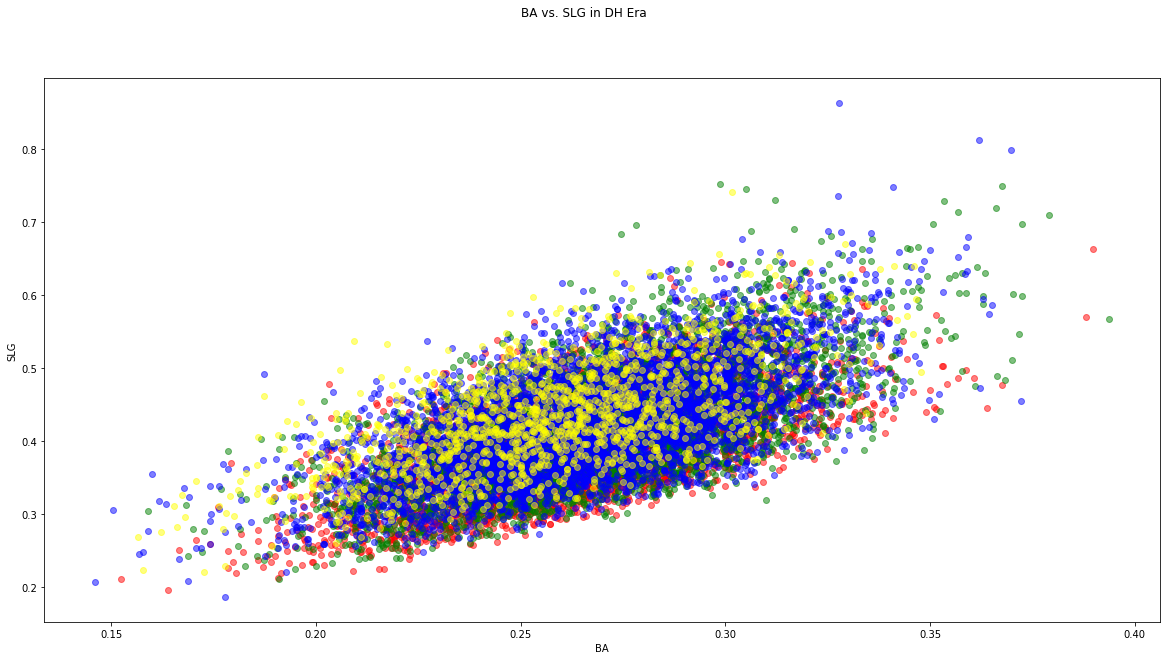

In [161]:
# plotting batting average vs. slugging percentage in the DH era ON THE SAME GRAPH



fig, axarr = plt.subplots(1, figsize=(20,10), sharex = True)


# 1973-1986

b1973_1986 = (batting.yearID>=1973)&(batting.yearID<=1986)

x = batting[b1973_1986]["BA"]
y = batting[b1973_1986]["SLG"]
axarr.scatter(x, y, color="red", alpha=0.5)

axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

axarr.set_ylabel("1973 to 1986")

# 1987-2000

b1987_2000 = (batting.yearID>=1987)&(batting.yearID<=2000)

x = batting[b1987_2000]["BA"]
y = batting[b1987_2000]["SLG"]
axarr.scatter(x, y, color="green", alpha=0.5)

axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

axarr.set_ylabel("1987 to 2000")

# 2001-2015

b2001_2015 = (batting.yearID>=2001)&(batting.yearID<=2015)

x = batting[b2001_2015]["BA"]
y = batting[b2001_2015]["SLG"]
axarr.scatter(x, y, color="blue", alpha=0.5)

axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

axarr.set_ylabel("2001 to 2015")

# 2016-2020

b2016_2020 = (batting.yearID>=2016)&(batting.yearID<=2020)

x = batting[b2016_2020]["BA"]
y = batting[b2016_2020]["SLG"]
axarr.scatter(x, y, color="yellow", alpha=0.5)

axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

fig.suptitle('BA vs. SLG in DH Era')


plt.show()

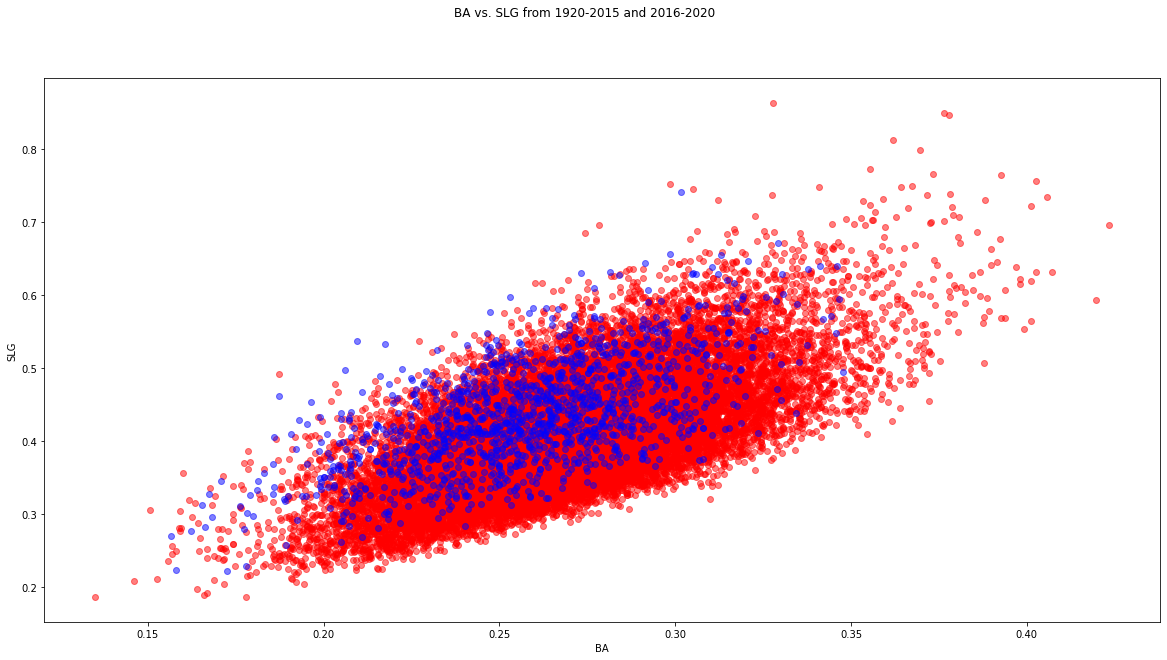

1.565887518297315
1.41264449367589


In [163]:
# Plotting BA vs. SLG from 1920-2015 as compared to 2016-2020


fig, axarr = plt.subplots(1, 1, figsize=(20,10), sharex = True)


b1920_2015 = (batting.yearID>=1920)&(batting.yearID<=2015)

x = batting[b1920_2015]["BA"]
y = batting[b1920_2015]["SLG"]
axarr.scatter(x, y, color="red", alpha=0.5, label='1920-2015')
axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

c, b = np.polyfit(x, y, 1)




b2016_2020 = (batting.yearID>=2016)&(batting.yearID<=2020)

x = batting[b2016_2020]["BA"]
y = batting[b2016_2020]["SLG"]
axarr.scatter(x, y, color="blue", alpha=0.5, label='2016-2020')
axarr.set_ylabel("2016 to 2020")
axarr.set_xlabel("BA")
axarr.set_ylabel("SLG")

d, b = np.polyfit(x, y, 1)

fig.suptitle('BA vs. SLG from 1920-2015 and 2016-2020')



plt.show()

print(c)
print(d)

Lively Ball Era: 0.0064124457552020495
Post-War Era: 0.005600457184482515
Expansion Era: 0.005627285141508561
DH Era: 0.0054057218016360774


Text(0.5, 0.98, 'Home runs vs. ISO')

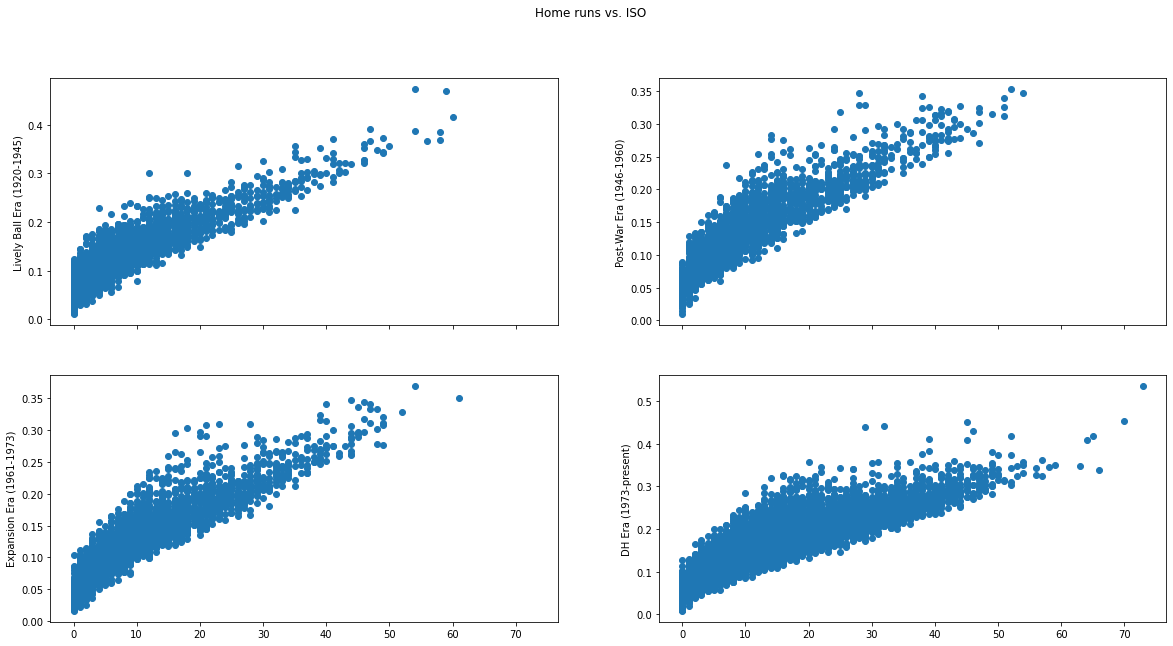

In [164]:
# plotting HRs vs. ISO after the Dead Ball Era

fig, axarr = plt.subplots(2, 2, figsize=(20,10), sharex = True)


# Lively Ball Era (1920-1945)

lively_ball_era = (batting.yearID>=1920)&(batting.yearID<=1945)


x = batting[lively_ball_era]["HR"]
y = batting[lively_ball_era]["ISO"]
axarr[0, 0].scatter(x, y)
axarr[0, 0].set_ylabel("Lively Ball Era (1920-1945)")

a, b = np.polyfit(x, y, 1)


# Post-War Era (1946-1960)

post_war_era = (batting.yearID>=1946)&(batting.yearID<=1960)


x = batting[post_war_era]["HR"]
y = batting[post_war_era]["ISO"]
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_ylabel("Post-War Era (1946-1960)")

c, b = np.polyfit(x, y, 1)


# Expansion Era (1961-1973)

expansion_era = (batting.yearID>=1961)&(batting.yearID<=1973)

x = batting[expansion_era]["HR"]
y = batting[expansion_era]["ISO"]
axarr[1, 0].scatter(x, y)
axarr[1, 0].set_ylabel("Expansion Era (1961-1973)")

d, b = np.polyfit(x, y, 1)


# DH Era (1973-present)

dh_era = batting["yearID"] >= 1973

x = batting[dh_era]["HR"]
y = batting[dh_era]["ISO"]
axarr[1, 1].scatter(x, y)
axarr[1, 1].set_ylabel("DH Era (1973-present)")

e, b = np.polyfit(x, y, 1)

print("Lively Ball Era: " + str(a))
print("Post-War Era: " + str(c))
print("Expansion Era: " + str(d))
print("DH Era: " + str(e))

fig.suptitle('Home runs vs. ISO')





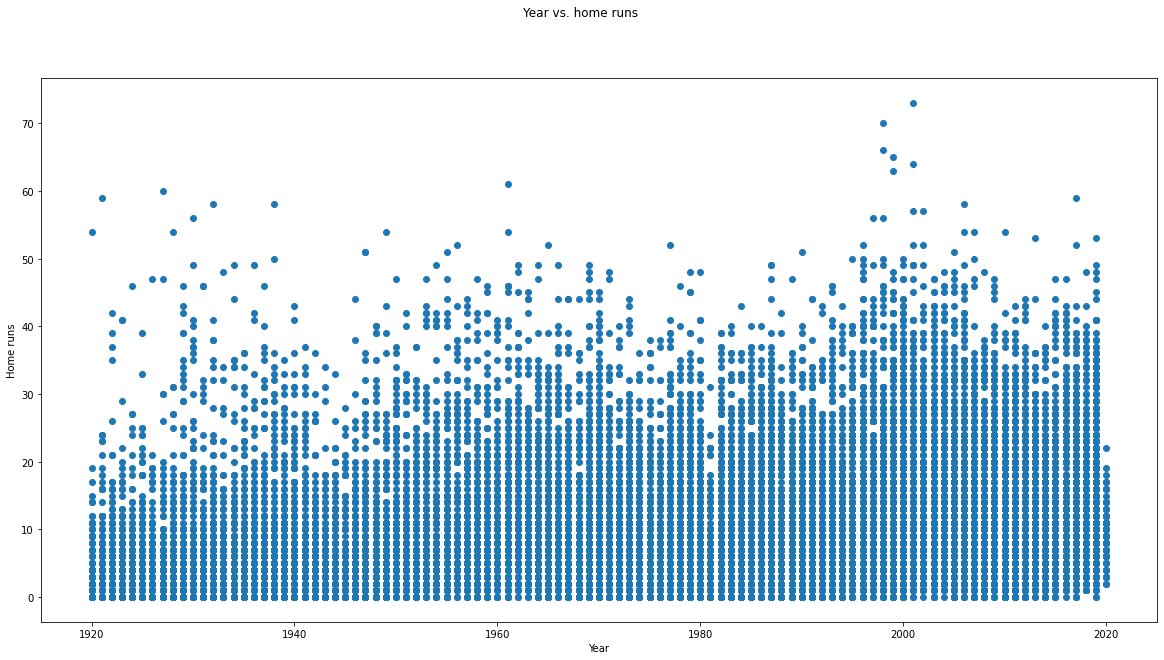

In [165]:
# plotting year by HRs

fig, axarr = plt.subplots(1, figsize=(20,10), sharex = True)

x = batting["yearID"]
y = batting["HR"]
axarr.set_xlabel("Year")
axarr.set_ylabel("Home runs")

axarr.scatter(x, y)


fig.suptitle('Year vs. home runs')

plt.show()



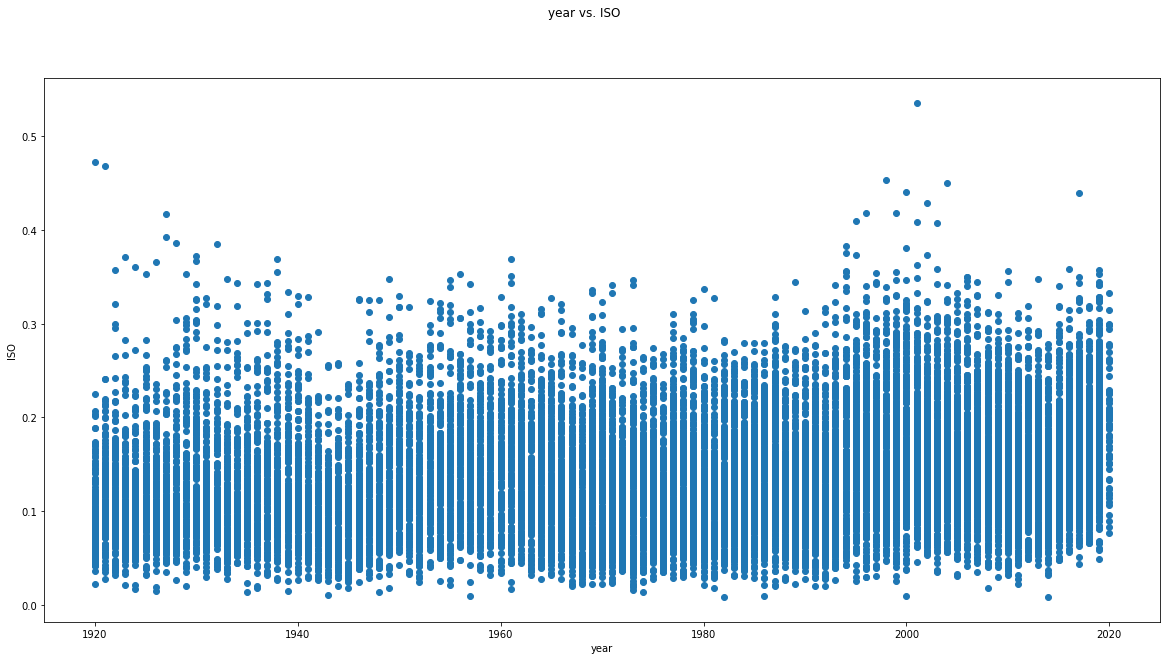

In [166]:
# plotting year vs. ISO

fig, axarr = plt.subplots(1, figsize=(20,10), sharex = True)

x = batting["yearID"]
y = batting["ISO"]
axarr.set_xlabel("year")
axarr.set_ylabel("ISO")

axarr.scatter(x, y)

fig.suptitle('year vs. ISO')


plt.show()
